<a href="https://colab.research.google.com/github/gzanellato-ia/03-MAIR-GZ-publico/blob/master/Aprendizaje_Supervisado/programa6_seleccionatributos(v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

**f_regression**: métrica de evaluación de atributos univariante que es capaz de detectar el grado de relación entre una columna y otra (lo aplicaremos entre un atributo y la clase), relación lineal de Pearson

**mutual_info_regression**: métrica de evaluación de atributos univariante pero que mide la información mutua entre dos variables numéricas (mide la entropía). No es necesariamente lineal

In [8]:
# Carga de datos.
np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)   # variable independiente o clase

# la tercera columna no está aportando a la definición de y

In [9]:
# Evaluación de atributos: F-Test.
f_test, _ = f_regression(X, y)   # vector de 3 números, uno por cada columna:
                                 #        array([187.42118421,  52.52357392,   0.47268298])
f_test /= np.max(f_test)         # normalizo a valores [0-1] (las métricas arrancan de cero)
                                 #        array([1.        , 0.28024353, 0.00252204])

In [10]:
f_test

array([1.        , 0.28024353, 0.00252204])

In [12]:
# Evaluación de atributos: información mutua.
mi = mutual_info_regression(X, y)
mi /= np.max(mi)
mi

array([0.36448455, 1.        , 0.        ])

El segundo atributo = 1, hay una relación directa entre el atributo y la clase

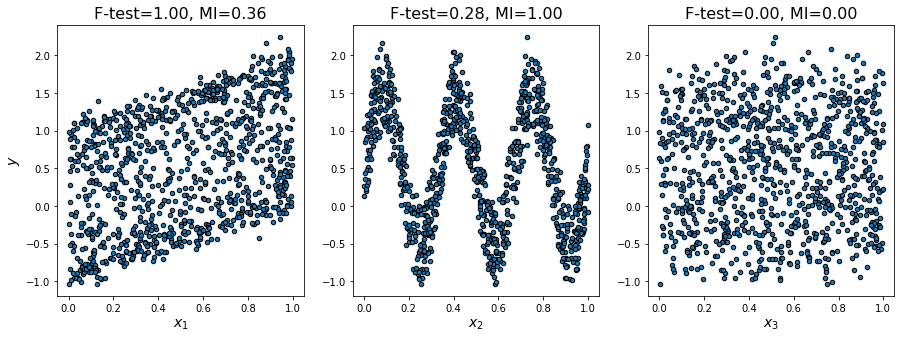

In [15]:
# Graficar distribución de los datos y evaluación de atributos.
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i],
                  mi[i]), fontsize=16)
plt.show()